In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
academic = pd.read_csv('CSV/academic.csv')
advising = pd.read_csv('CSV/advising.csv')
atis = pd.read_csv('CSV/atis.csv')
geo = pd.read_csv('CSV/geo.csv')
imdb = pd.read_csv('CSV/imdb.csv')
restaurants = pd.read_csv('CSV/restaurants.csv')
scholar = pd.read_csv('CSV/scholar.csv')
spider = pd.read_csv('CSV/spider.csv')
wikisql = pd.read_csv('CSV/wikisql.csv')
yelp = pd.read_csv('CSV/yelp.csv')
medical = pd.read_csv("CSV/data_medical.csv")
df_tsv = pd.read_csv("CSV/all_questions.csv")
cosql = pd.read_csv("CSV/cosql.csv")

data_list = [academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, medical, df_tsv]
 
names = ['academic', 'advising', 'atis', 'geo', 'imdb', 'restaurants', 'scholar', 'spider', 'wikisql', 'yelp', 'medical' ,
        'train_spider', 'test_spider', 'train_others', 'train_sparc','test_spark', 'cosql_all']

In [3]:
def description(data, words, names):
    for word in words:
          data[word] = data.sql.str.count(word)
    data_info = pd.DataFrame()
    result = pd.DataFrame()
    sql = data['sql'].str.upper().str.split()
    question = data['question'].str.upper().str.split()
    data['sqlSplit'] = sql
    data['questionSplit'] = question
    data['questionUniqueCounter'] = question.apply(set).apply(len)
    data['sqlUniqueCounter'] = sql.apply(set).apply(len)
    for name in names:
        data_new = data[data['source'] == name]
              
        data_info['mean_len_sql'] = [data_new['sqlUniqueCounter'].mean()]
        data_info['median_len_sql'] = [data_new['sqlUniqueCounter'].median()]
        data_info['std_len_sql'] = [data_new['sqlUniqueCounter'].std()]    
        data_info['mean_len_question'] = [data_new['questionUniqueCounter'].mean()]
        data_info['median_len_question'] = [data_new['questionUniqueCounter'].median()]
        data_info['std_len_question'] = [data_new['questionUniqueCounter'].std()]
        data_info['source'] = name
        result = pd.concat([result,data_info], axis=0, join='outer', ignore_index=False)
    
    return result

In [4]:
medical.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
def number_of_keyWords(data,words,names):
    data_keywords = pd.DataFrame()
    result = pd.DataFrame()
    for name in names:
        filtered_by_source = data[data['source'] == name]
        for word in words:
            data_keywords[word] = [filtered_by_source[word].sum()]
        data_keywords['source'] = name
        result = pd.concat([result,data_keywords], axis=0, join='outer', ignore_index=False)
    return result

In [6]:
words = ['SELECT','WHERE','JOIN', 'HAVING','LIKE','GROUP BY','COUNT','DISTINCT','MIN','MAX','AVG',
         'ORDER BY', 'DATE','LIMIT']


In [7]:
final_df = pd.concat([academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, medical, df_tsv], axis=0, join='outer', ignore_index=False)

In [8]:
final_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [36]:
final_df

,question,source,sql,SELECT,WHERE,JOIN,HAVING,LIKE,GROUP BY,COUNT,...,MIN,MAX,AVG,ORDER BY,DATE,LIMIT,sqlSplit,questionSplit,questionUniqueCounter,sqlUniqueCounter
0,return me the homepage of journal_name0 .,academic,SELECT JOURNALalias0.HOMEPAGE FROM JOURNAL AS ...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,"[SELECT, JOURNALALIAS0.HOMEPAGE, FROM, JOURNAL...","[RETURN, ME, THE, HOMEPAGE, OF, JOURNAL_NAME0, .]",7,11
1,"return me the homepage of "" author_name0 "" .",academic,SELECT AUTHORalias0.HOMEPAGE FROM AUTHOR AS AU...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,"[SELECT, AUTHORALIAS0.HOMEPAGE, FROM, AUTHOR, ...","[RETURN, ME, THE, HOMEPAGE, OF, "", AUTHOR_NAME...",8,11
2,"return me the abstract of "" publication_title0...",academic,SELECT PUBLICATIONalias0.ABSTRACT FROM PUBLICA...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,"[SELECT, PUBLICATIONALIAS0.ABSTRACT, FROM, PUB...","[RETURN, ME, THE, ABSTRACT, OF, "", PUBLICATION...",8,11
3,"return me the year of "" publication_title0 """,academic,SELECT PUBLICATIONalias0.YEAR FROM PUBLICATION...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,"[SELECT, PUBLICATIONALIAS0.YEAR, FROM, PUBLICA...","[RETURN, ME, THE, YEAR, OF, "", PUBLICATION_TIT...",7,11
4,return me the papers after publication_year0 .,academic,SELECT PUBLICATIONalias0.TITLE FROM PUBLICATIO...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,"[SELECT, PUBLICATIONALIAS0.TITLE, FROM, PUBLIC...","[RETURN, ME, THE, PAPERS, AFTER, PUBLICATION_Y...",7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,What are the countries where either English or...,cosql_all,SELECT * FROM COUNTRY JOIN COUNTRYLANGUAGE ON ...,2,2,2,0,0,0,12,...,0,0,0,0,0,0,"[SELECT, *, FROM, COUNTRY, JOIN, COUNTRYLANGUA...","[WHAT, ARE, THE, COUNTRIES, WHERE, EITHER, ENG...",12,18
14213,Find the average age of students who do not ha...,cosql_all,SELECT AVG(AGE) FROM STUDENT WHERE STUID NOT I...,2,1,1,0,0,0,0,...,0,0,1,0,0,0,"[SELECT, AVG(AGE), FROM, STUDENT, WHERE, STUID...","[FIND, THE, AVERAGE, AGE, OF, STUDENTS, WHO, D...",12,15
14257,Find the name of students who have both cat an...,cosql_all,SELECT STUDENT.FNAME FROM STUDENT JOIN HAS_PET...,2,2,4,0,0,0,0,...,0,0,0,0,0,0,"[SELECT, STUDENT.FNAME, FROM, STUDENT, JOIN, H...","[FIND, THE, NAME, OF, STUDENTS, WHO, HAVE, BOT...",12,18
14501,What is the total population and average area ...,cosql_all,"SELECT SUM(POPULATION) , AVG(SURFACEAREA) FROM...",1,1,0,0,0,0,1,...,0,0,1,0,0,0,"[SELECT, SUM(POPULATION), ,, AVG(SURFACEAREA),...","[WHAT, IS, THE, TOTAL, POPULATION, AND, AVERAG...",18,15


In [9]:
final_df = final_df.drop_duplicates(subset=['question'])

In [10]:
description_df = description(final_df, words, names)

In [11]:
data_keywords = number_of_keyWords(final_df, words, names)

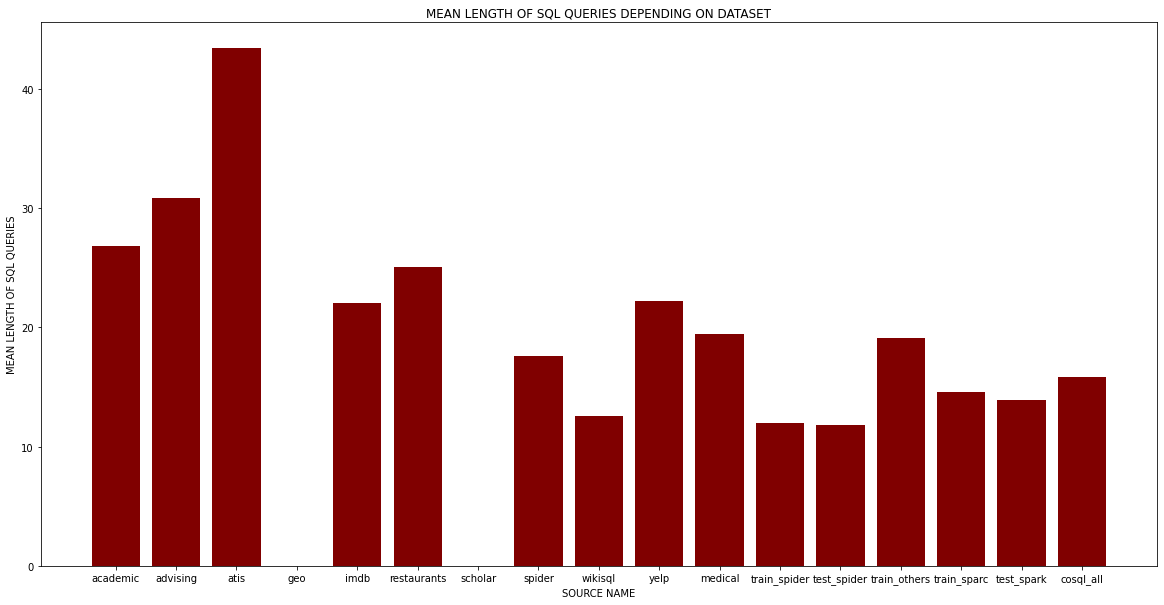

In [12]:
fig = plt.figure(figsize = (20, 10))
plt.bar(description_df['source'], description_df['mean_len_sql'], color ='maroon',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF SQL QUERIES")
plt.title("MEAN LENGTH OF SQL QUERIES DEPENDING ON DATASET")
plt.show()

In [13]:
final_df[final_df['source'] == 'geo']

,question,source,sql,SELECT,WHERE,JOIN,HAVING,LIKE,GROUP BY,COUNT,...,MIN,MAX,AVG,ORDER BY,DATE,LIMIT,sqlSplit,questionSplit,questionUniqueCounter,sqlUniqueCounter


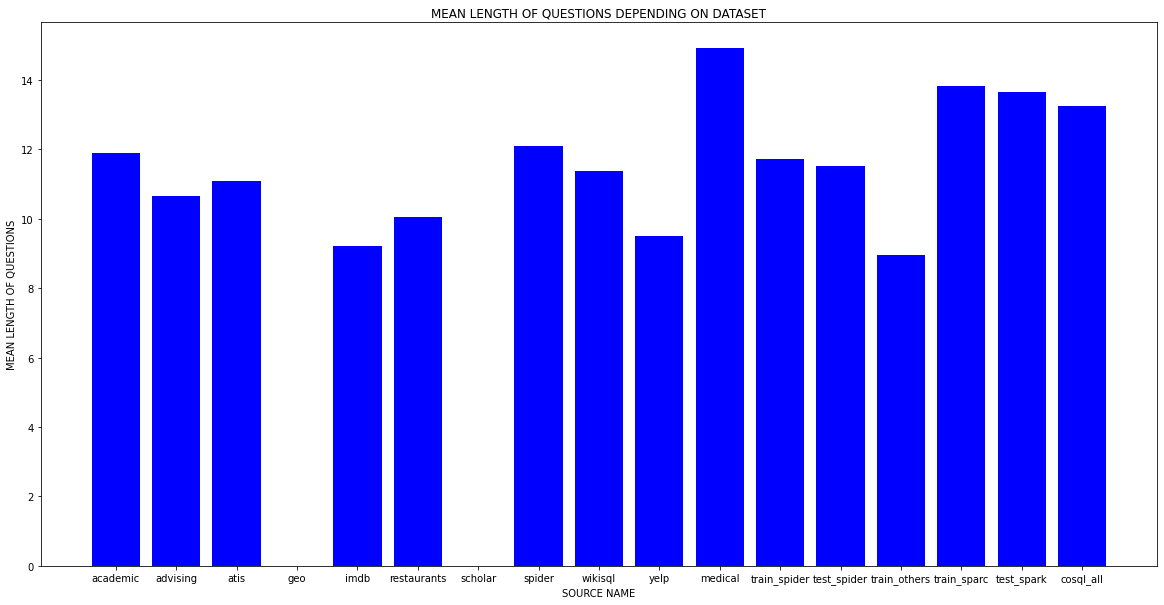

In [14]:
fig = plt.figure(figsize = (20, 10))
plt.bar(description_df['source'], description_df['mean_len_question'], color ='blue',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF QUESTIONS")
plt.title("MEAN LENGTH OF QUESTIONS DEPENDING ON DATASET")
plt.show()

In [15]:
grouped = final_df.groupby('source').count()
grouped['sql']

source
academic          185
advising         4366
atis             3827
cosql_all           8
geography         607
imdb              125
medical         22512
restaurants       125
spider           9342
test_spark         20
test_spider      1019
train_others     1375
train_sparc        84
train_spider     6926
wikisql         75430
yelp              122
Name: sql, dtype: int64

In [16]:
final_df.isna().sum()

question                 0
source                   0
sql                      0
SELECT                   0
WHERE                    0
JOIN                     0
HAVING                   0
LIKE                     0
GROUP BY                 0
COUNT                    0
DISTINCT                 0
MIN                      0
MAX                      0
AVG                      0
ORDER BY                 0
DATE                     0
LIMIT                    0
sqlSplit                 0
questionSplit            0
questionUniqueCounter    0
sqlUniqueCounter         0
dtype: int64

In [17]:
data_keywords = data_keywords.loc[(data_keywords[['SELECT']] != 0).all(axis=1)]
data_keywords

,SELECT,WHERE,JOIN,HAVING,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG,ORDER BY,DATE,LIMIT,source
0,193,182,0,18,0,38,85,79,0,0,0,22,0,22,academic
0,5264,5231,3557,0,3172,92,954,3843,324,76,10,268,0,171,advising
0,5259,5232,0,0,13,8,69,3832,437,118,0,0,9782,0,atis
0,126,125,0,0,0,6,31,31,0,1,0,10,0,10,imdb
0,156,156,0,0,0,0,14,0,0,23,0,0,0,0,restaurants
0,10752,6046,6592,544,275,2226,5966,1581,455,410,615,2026,772,1341,spider
0,75448,74848,144,3,0,0,9767,0,5597,4681,3321,0,8580,13,wikisql
0,122,122,0,1,4,8,58,39,0,0,4,8,0,8,yelp
0,22512,22512,16700,0,0,0,17407,17482,616,574,525,0,0,0,medical
0,7976,3959,3790,437,175,1772,3608,742,368,300,539,1618,627,1102,train_spider


In [18]:
data_percents = data_keywords.copy()
data_percents['total'] = data_keywords[words].sum(axis=1)
data_percents = data_percents.drop(['source'], axis=1)
data_percents = data_percents.div(data_percents.total, axis='index') * 100
data_percents.drop(['total'], axis=1, inplace=True)
data_percents

,SELECT,WHERE,JOIN,HAVING,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG,ORDER BY,DATE,LIMIT
0,30.203443,28.482003,0.000000,2.816901,0.000000,5.946792,13.302034,12.363067,0.000000,0.000000,0.000000,3.442879,0.000000,3.442879
0,22.924832,22.781117,15.490811,0.000000,13.814128,0.400662,4.154690,16.736347,1.411027,0.330982,0.043550,1.167146,0.000000,0.744709
0,21.248485,21.139394,0.000000,0.000000,0.052525,0.032323,0.278788,15.482828,1.765657,0.476768,0.000000,0.000000,39.523232,0.000000
0,37.058824,36.764706,0.000000,0.000000,0.000000,1.764706,9.117647,9.117647,0.000000,0.294118,0.000000,2.941176,0.000000,2.941176
0,44.699140,44.699140,0.000000,0.000000,0.000000,0.000000,4.011461,0.000000,0.000000,6.590258,0.000000,0.000000,0.000000,0.000000
0,27.150830,15.267291,16.646044,1.373703,0.694427,5.621070,15.065276,3.992323,1.148961,1.035327,1.552991,5.116032,1.949446,3.386278
0,41.363582,41.034638,0.078947,0.001645,0.000000,0.000000,5.354656,0.000000,3.068497,2.566310,1.820704,0.000000,4.703896,0.007127
0,32.620321,32.620321,0.000000,0.267380,1.069519,2.139037,15.508021,10.427807,0.000000,0.000000,1.069519,2.139037,0.000000,2.139037
0,22.894801,22.894801,16.983972,0.000000,0.000000,0.000000,17.702994,17.779269,0.626475,0.583760,0.533927,0.000000,0.000000,0.000000
0,29.526524,14.655906,14.030282,1.617740,0.647836,6.559805,13.356532,2.746826,1.362307,1.110576,1.995336,5.989709,2.321105,4.079517


In [38]:
# label = words
# n = data_percents.shape[0]
# i = 0
# for j in range(1,n+1):
#     plt.figure(figsize=(10,10))
#     plt.pie(np.array(data_percents.iloc[j-1:j, :].values).reshape(-1), labels=label, autopct='%1.1f%%')
#     plt.legend()
#     plt.title(data_keywords['source'].iloc[j-1].upper())
#     i += 1
#     plt.show()


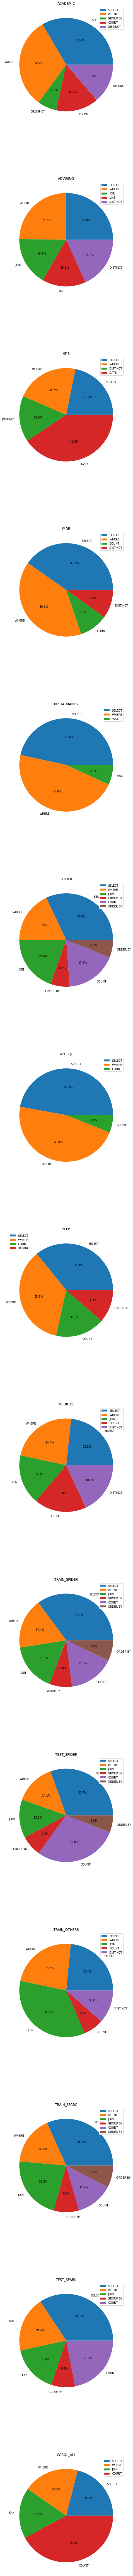

In [35]:
from matplotlib import pyplot as plt

import pandas as pd   

df = pd.DataFrame({'beer':[1,2,3],
               'spirit':[4,5,6],
               'wine':[7,8,9]}, index=['Africa','Asia','Europe'])    

df= df.div(df.sum(axis=1), axis=0)


fig, axs = plt.subplots(nrows=data_percents.index.size, ncols=1, figsize=(170,170))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

for j in range(1,data_percents.index.size+1):
    
    data = [item for item in (data_percents.iloc[j-1:j, :]).values.reshape(-1) if item>5]
    labels = [col for item,col in zip((data_percents.iloc[j-1:j, :]).values.reshape(-1),
                                      data_percents.iloc[j-1:j, :]) if item>5]
    
    fig.add_subplot(axs[j-1])
    
    plt.pie(data, labels=labels, autopct='%1.1f%%')
    plt.title(data_keywords['source'].iloc[j-1].upper())
    plt.legend()
    plt.axis('off')